# **Introduction to OpenCV, Spatial Filtering and Edge Detection**
## Image Processing and Computer Vision - Lab Session No. 1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it

Importing data from Google Drive folder.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


On Google Colab we can use any bash command by preprending `!` to a command.
For instance, if we want to list the content of a directory we can use the command `ls`:

In [53]:
!ls /content/drive/MyDrive/ComputerVision_labs/lab01

lab_session_1_images.zip  lab_session_1.ipynb
lab_session_1_images.zip  lab_session_1.ipynb


With the command `cp` we can copy the content of a folder in the root of the Colab notebook.
In particular, we want to copy the zipped folder `lab1_images.zip` containing the images for this lab session:

In [54]:
!cp -r /content/drive/MyDrive/ComputerVision_labs/lab01/lab_session_1_images.zip ./

Then, we use the command `unzip` to extract the content of the zipped folder:

In [5]:
!unzip lab_session_1_images.zip

Archive:  lab_session_1_images.zip
replace lenna.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 1. OpenCV



[OpenCV](https://opencv.org/) (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being an Apache 2 licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene, find similar images from an image database, remove red eyes from images taken using flash, follow eye movements, recognize scenery and establish markers to overlay it with augmented reality, etc. OpenCV has more than 47 thousand people of user community and estimated number of downloads exceeding 18 million. The library is used extensively in companies, research groups and by governmental bodies.

Along with well-established companies like Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota that employ the library, there are many startups such as Applied Minds, VideoSurf, and Zeitera, that make extensive use of OpenCV. OpenCV’s deployed uses span the range from stitching streetview images together, detecting intrusions in surveillance video in Israel, monitoring mine equipment in China, helping robots navigate and pick up objects at Willow Garage, detection of swimming pool drowning accidents in Europe, running interactive art in Spain and New York, checking runways for debris in Turkey, inspecting labels on products in factories around the world on to rapid face detection in Japan.

It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. OpenCV leans mostly towards real-time vision applications and takes advantage of MMX and SSE instructions when available. A full-featured CUDAand OpenCL interfaces are being actively developed right now. There are over 500 algorithms and about 10 times as many functions that compose or support those algorithms. OpenCV is written natively in C++ and has a templated interface that works seamlessly with STL containers.

To import the library we can simply:

In [6]:
import cv2

To test if the import succeded, we can print the version number:

In [7]:
print("The OpenCV version is:", cv2.__version__)

The OpenCV version is: 4.8.0


We will also need to import [NumPy](https://numpy.org/) and [Matplotlib](https://matplotlib.org/) to work and display images in Python:

In [8]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Load an image

The function `cv2.imread(img_path)` load the image from the specified `img_path` path.
Although in this case we passed the **relative path** to the folder where we have this notebook, you can pass also the **absolute path** to the image.

In [9]:
image = cv2.imread('avengers.png')

*But what is an image under the hood in Python?*

In [10]:
type(image) # is an array, so we use numpy library to manipulate teh images

numpy.ndarray

In Python, OpenCV represents images as NumPy arrays. Since images are NumPy arrays, we are able to use all NumPy methods also on images.

For example we can print the shape of the image as we do with NumPy arrays:

In [11]:
print(image.shape) # colored images are tensors, one dimension for each color (RGB)

(549, 910, 3)


Such shape *(H,W,C)* represents the **height**, **width** and **number of channels** of the image.

In this case we have an image with **height = 549**, **width = 910** and **number of channels = 3**.


In [12]:
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]

print(f"The height is: {H}.")
print(f"The width is: {W}.")
print(f"The number of channels is: {C}.")

The height is: 549.
The width is: 910.
The number of channels is: 3.


Moreover, if you want to get the bit-depth (the number of bits per pixel) of an image you can inspect the type of the array:

In [13]:
image.dtype # number of bit per pixel

dtype('uint8')

Images usually have 8-bit depth, therefore, each pixel contains a value from $2^0 = 0$ to $2^8 - 1 = 255$.

### 1.2 Display an image

Using Matplotlib we are able to display the image with the command `plt.imshow()`:

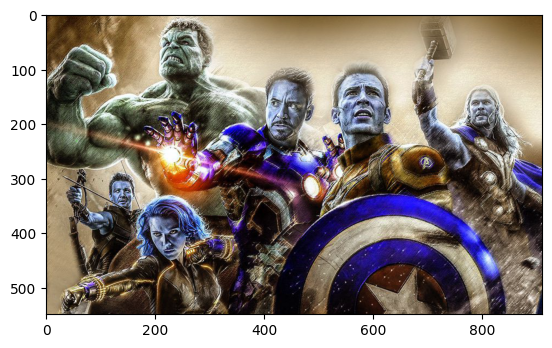

In [14]:
plt.imshow(image)
plt.show()

*Why are the colors so strange?*

Usually, colored images have 3 channels in the so called RGB format: **red**, **green** and **blue**. Indeed, Matplotlib requires images in this format to display them correctly.

On the other hand, OpenCV loads images with the BGR format: **blue**, **green** and **red**.

It is just a convention. So if we want to plot images with the "right" colours we need to convert them:

In [15]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #openCV import images in BGR format, so we need to convert them into RGB before we display them

And then, we can plot the new version:

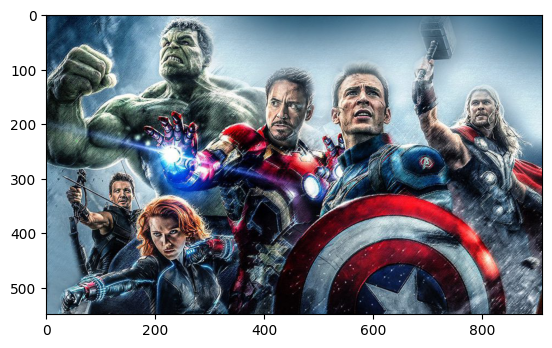

In [16]:
plt.imshow(image_rgb)
plt.show()

The function `cv2.cvtColor(image, converstion_type)` will return the modified version of the original `image` applying the conversion represented by `converstion_type`. In this case, `cv2.COLOR_BGR2RGB` means a conversion from BGR to RGB.

If we want bigger visualizations we can set the figure dimension using `plt.figure(figsize = (height_value, width_value)`:

In [17]:
plt.figure(figsize = (20, 10))
plt.imshow(image_rgb) # plt.imshow changes the figure size to mantain the image aspect ratio.
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 1.3 Accessing the image pixels

In Python we can say that an image is represented as a **matrix**.
Each element of the matrix represents one **pixel**.

Since a color image has 3 channels per pixel, our representation is not a simple matrix, but rather 3-dimensional representation called **tensor**.

So let's try to access one random pixel, for example one belonging to Ironman's suit:

In [18]:
ironman_pixel = image_rgb[280, 400] # has three channels per pixel

print(f"The pixel value is: {ironman_pixel}.")

The pixel value is: [125   0  27].


With the previous notation we accessed to the pixel with:
* row = 280;
* column = 400.

Let's visualize this pixel by drawing a circle around it:

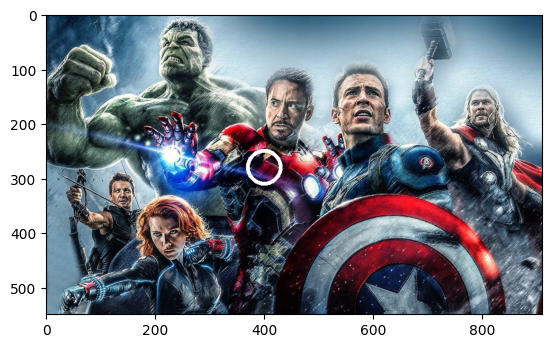

In [19]:
# We first create a copy of the image to do the drawings without changing the original image.
image_copy = np.copy(image_rgb)

cv2.circle(
    image_copy, # Image on which to draw the circle.
    (400,280), # Position of the center of the circle (pixel position).
    30, # Radius of the circle.
    [255, 255, 255], # Colour of the circle (white).
    5 # Thickness.
  )

plt.imshow(image_copy)
plt.show()

So now we know that an RGB image has 3 values per pixel representing the red, green and blue channels.

In [20]:
# Accessing blue, green and red values of the pixel

red = ironman_pixel[0]
green = ironman_pixel[1]
blue = ironman_pixel[2]

print(f"The RGB value of the pixel is: R = {red}, G = {green}, B = {blue}.")

The RGB value of the pixel is: R = 125, G = 0, B = 27.


As expected, the dominant color is indeed **red**.

What about an hulk pixel?

In [21]:
# Pixel vector
hulk_pixel = image_rgb[232,56]

# Separated colors
hulk_pixel_red = image_rgb[232,56,0]
hulk_pixel_green = image_rgb[232,56,1]
hulk_pixel_blue = image_rgb[232,56,2]

print(f"The RGB value of the pixel is: R = {hulk_pixel_red}, G = {hulk_pixel_green}, B = {hulk_pixel_blue}.")

The RGB value of the pixel is: R = 0, G = 255, B = 0.


And as expected, the dominant color is **green**. We also saw another way to access to a pixel values.






With two indices (pixel location) we access the image pixel value:

```
pixel = image_rgb[232,56]
```

Then, we address each pixel component (channel) with another index:


```
red = pixel[0]
```

Or we can retrieve the pixel component directly with 3 indices:


```
pixel_red = image[232,56,0]
```

### 1.4 Grayscale Images

In the previous sections we managed colored image only, but grayscale images are also widespreadly emplyed in Computer Vision.

To load a grayscale image we need to add `cv2.IMREAD_GRAYSCALE` in the `cv2.imread()` function, otherwise OpenCV load a 3-channel image by default:

In [22]:
grayscale_image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

print(f"The shape of this grayscale image is: {grayscale_image.shape}.")

The shape of this grayscale image is: (512, 512).


Note that grayscale images have only a single channel, so when loading them we will have no 3rd dimension in the array!

Let's plot the image:

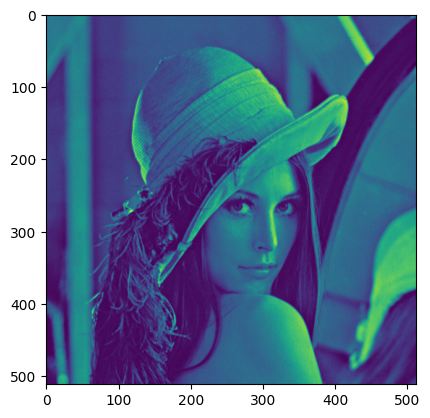

In [23]:
plt.imshow(grayscale_image)
plt.show()

In the case of grayscale images we need to specify the colormap `cmap` to tell to the plot library that it is a grayscale image:

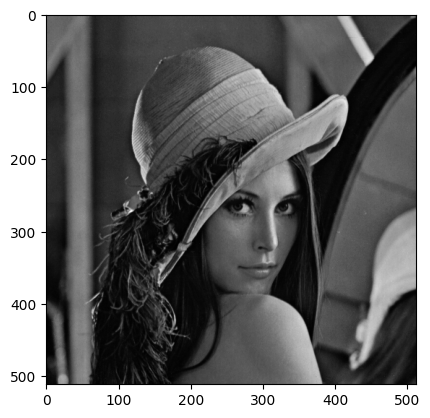

In [24]:
plt.imshow(grayscale_image, cmap = 'gray')  # specify the cmap
plt.show()

Each pixel is not a vector anymore, but a single intensity value between 0 and 255:

In [25]:
grayscale_image[0,0] # single intensity value pixel

101

Remember that a pixel value of 0 is **black** while a value of 255 is **white**.



Sometimes we want to convert color images into grayscale images. To do so we can still use `cv2.cvtColor()` but with a different flag:

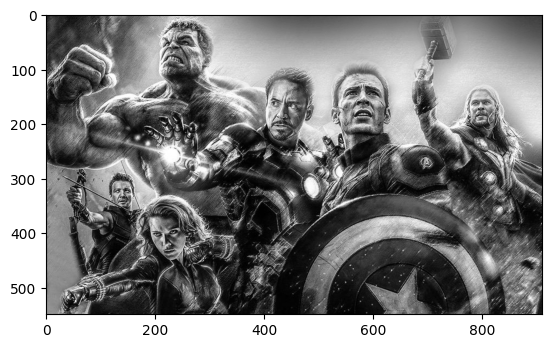

In [26]:
image_color2grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_color2grayscale, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

### 1.5. Access R, G, B channels separately

In coloured images each channel R,G,B can be seen as a single R,G,B image and can be plot independently.

If we want to access the three channels separately we can do it easily using slicing.

So let us extract the 3 channels representing the R,G,B values of the image and plot them in three different grayscale images:

In [27]:
R = image_rgb[:,:,0] # Getting the first axis (R)
G = image_rgb[:,:,1] # Getting the second axis (G)
B = image_rgb[:,:,2] # Getting the third axis (B)

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)

(549, 910) (549, 910) (549, 910)


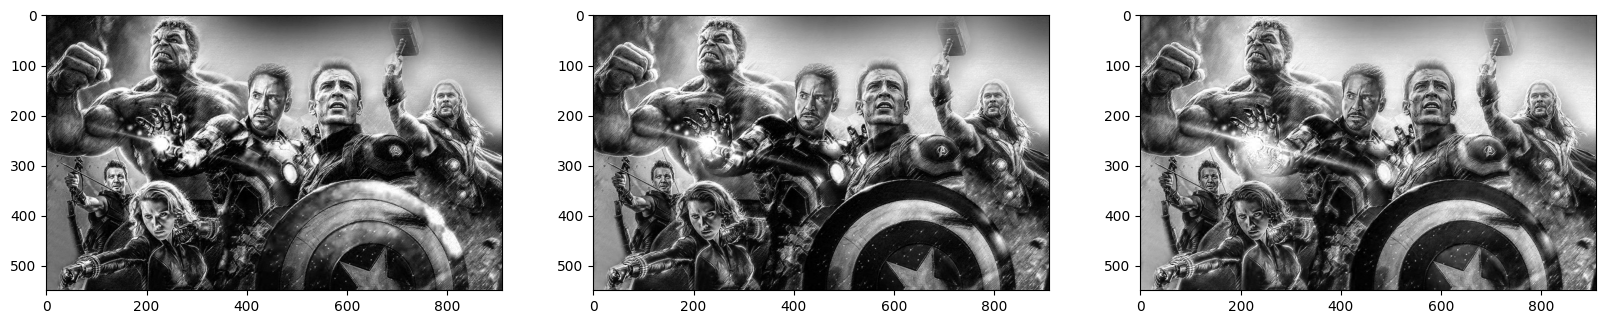

In [28]:
plt.figure(figsize = (20, 10))

plt.subplot(1,3,1)
plt.imshow(R, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(1,3,2)
plt.imshow(G, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(1,3,3)
plt.imshow(B, cmap = 'gray', vmin = 0, vmax = 255)

plt.show()

In [29]:
# obviously they are gray images, beacause they have only one channel

In the image above you cannot really disambiguate the three images because the 3 axis contain similar information.

Let us try with a completely green image:

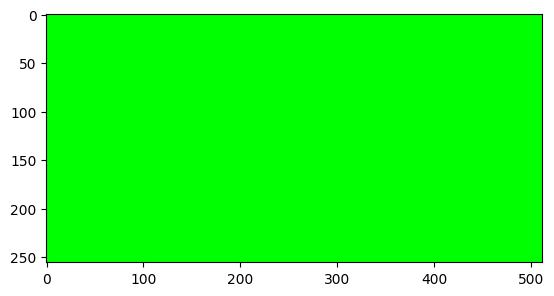

In [30]:
green_image_bgr = cv2.imread("green.png") #all green image
green_image_rgb = cv2.cvtColor(green_image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(green_image_rgb)
plt.show()

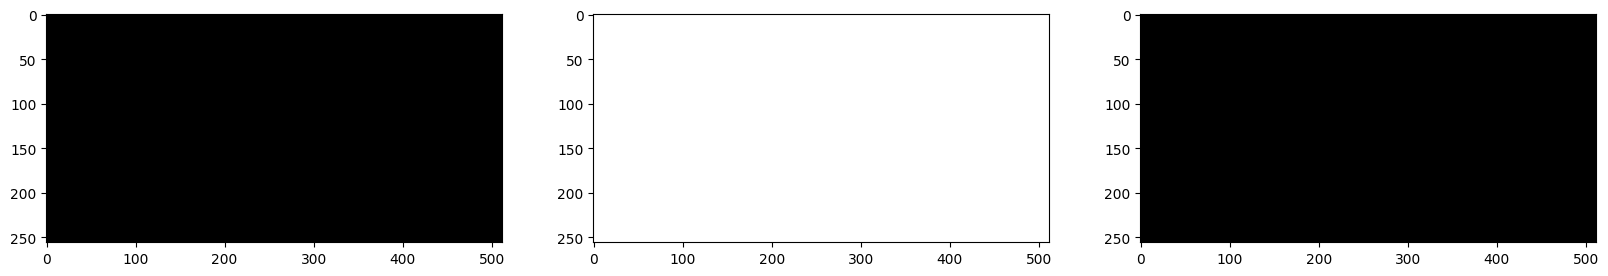

In [31]:
R = green_image_rgb[:,:,0] # Getting the first axis (R)
G = green_image_rgb[:,:,1] # Getting the second axis (G)
B = green_image_rgb[:,:,2] # Getting the third axis (B)

plt.figure(figsize = (20, 10))

plt.subplot(1,3,1)
plt.imshow(R, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(1,3,2)
plt.imshow(G, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(1,3,3)
plt.imshow(B, cmap = 'gray', vmin = 0, vmax = 255)

plt.show() #display teh intensity value in grayscale for each channel

Only the green channel has values greater than 0!

Note: now that we know how to extract channels, we could perform the BGR to RGB conversion simply by splitting the channels and than concatenating them in the inverse order along the third dimension using NumPy.

We can use `np.stack([R,G,B], axis = 2)` to do that.

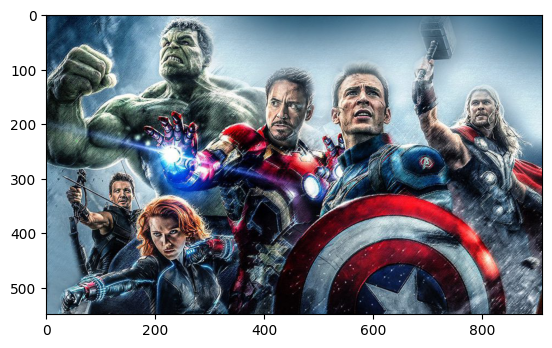

In [32]:
# Stacking B,G,R along the axes of channels (axis=-1, last channel).

B = image[:,:,0] # Getting the first axis (B)
G = image[:,:,1] # Getting the second axis (G)
R = image[:,:,2] # Getting the third axis (R)

image_rgb = np.stack([R,G,B], axis = -1) # Axis specifies the position of the new axis. -1 means last position.

plt.imshow(image_rgb)
plt.show()

### 1.6 Access Region of Interest (ROI)

In the previous section we have seen how to access to single pixels, but we can do the same with a bigger portion of image.

We just need to do slicing as we do for NumPy arrays.

For example if we want to extract Captain America from the starting image, what slicing do we need?

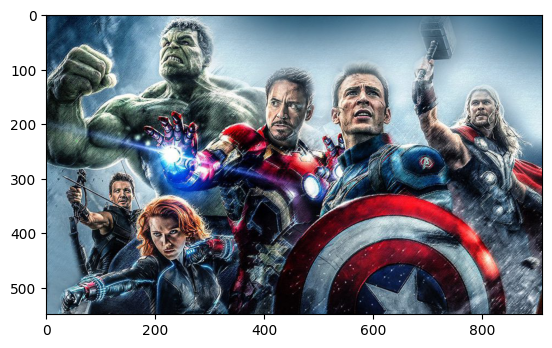

In [33]:
# Displaying starting image
plt.imshow(image_rgb)
plt.show()

To cut out Captain America of the image we need to perform the following slicing:

In [34]:
captain_america = image_rgb[100:, 400:820] # slicing

In the example above we accesed the ROI going from row 100 to last (100:) and from column 400 to column 820 (400:820), that contains the whole Captain America.

Note: rows are ordered from top to bottom while the columns from left to right.

Now let us show the selected ROI:

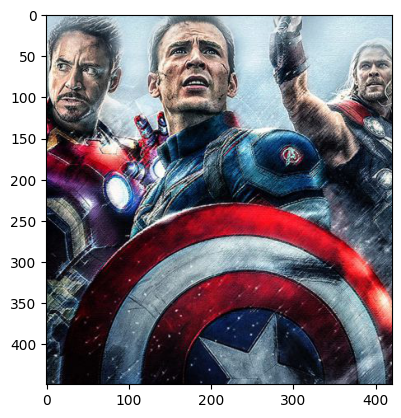

In [35]:
plt.imshow(captain_america)
plt.show()

### 1.7 Modify pixels and save an image

So far we accessed pixels without modifying the original image.

If we want to edit the value of a single pixel of the image we can do simple assignments:

In [36]:
print(f"Previous value: {grayscale_image[0,0]}.")

grayscale_image[0,0] = 255

print(f"New value: {grayscale_image[0,0]}.")

Previous value: 101.
New value: 255.


Tipically, before to modify images, it is raccomended to make a backup of those

images. To do so, we first copy the images and then we perform all modifications on the copy of the images.

Moreover we can modify more than one pixel at once.
For instance, let us try to edit the `lenna.png` grayscale image around the eye of the girl:

In [37]:
# Copy of the original image
copied_image = grayscale_image.copy()

# Pupil coordinates
center_row = 264
center_column = 268
radius = 10

new_color = 255 # White

# Note: this is possible due to NumPy broadcasting. --> assign a matrix of values
copied_image[center_row - radius : center_row + radius, center_column - radius: center_column + radius] = new_color

And let us plot the modified image:

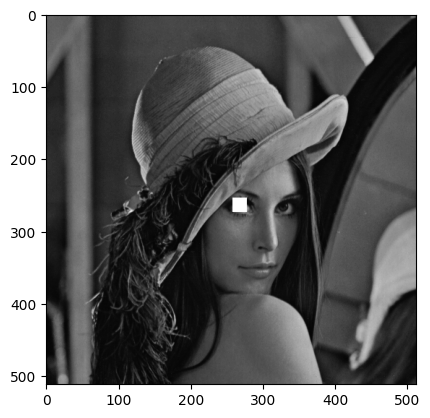

In [38]:
plt.imshow(copied_image, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

We can notice how the original image remains unchanged:

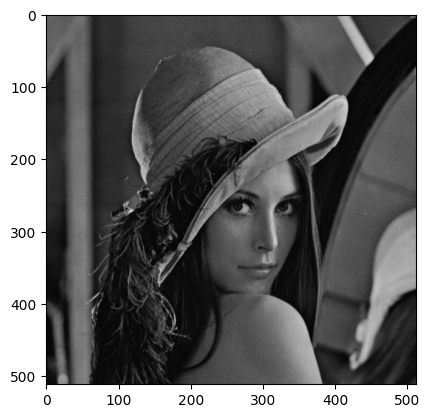

In [39]:
plt.imshow(grayscale_image, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

When we are done with the modifications, we can save the image on disk.

In [40]:
cv2.imwrite("lenna_white_pupill.png", copied_image) # save the image modified

True

In case of colour images if we want to modify a pixel we have to assing 3 values, one for each channel BGR:

In [41]:
copied_image_rgb = image_rgb.copy()

print(f"Previous value: {copied_image_rgb[0,0]}.")

copied_image_rgb[0,0] = [255, 255, 255]

print(f"New value: {copied_image_rgb[0,0]}.")

Previous value: [18 32 43].
New value: [255 255 255].


Same as in grayscale images we can modify more RGB pixels at once. Let us try to mask captain america assigning all white pixels to the ROI:

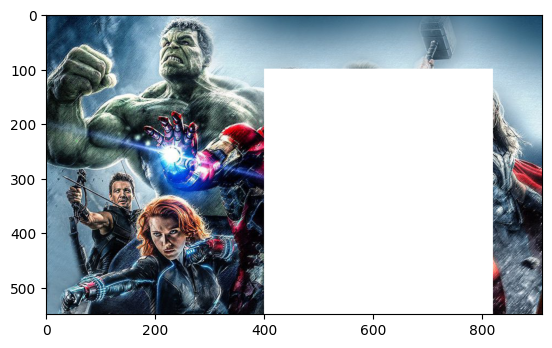

In [42]:
copied_image_rgb[100:, 400:820] = [255, 255, 255] # broadcasting --> assign a vector value to a matrix

plt.imshow(copied_image_rgb)
plt.show()

In the same way of before we can save the image.

With `cv2.imwrite` we can save our image with several codings such as \*.png, \*.jpg, *\.bmp, etc ...

**N.B** As for loading image, OpenCV expects to have a BGR image by default, but we performed the masking operation on an RGB image.

Remember to convert back to BGR before saving!

In [43]:
copied_image_bgr = cv2.cvtColor(copied_image_rgb, cv2.COLOR_RGB2BGR) # restore the original BGR
cv2.imwrite("avengers_no_captain_america.jpg", copied_image_bgr) # save the modified image

True

## 2. Spatial filtering



### 2.1 Local Operators: Convolutions and Correlations

Brief recap:

1. As you already know, **Local Operators** compute the new intensity $I$ of a pixel, $p$, based on the intensities of those belonging to a neighbourhood of $N(p)$.

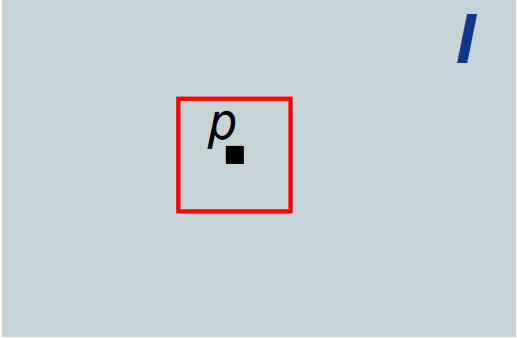

2. You also already know that **convolutions and correlations** are the same if we have a **symmetric** kernel respect to the **origin**:

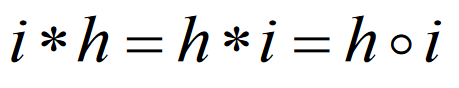


Practically, local operator kernels are usually symmetric about the origin so usually we compute **correlations** instead of convolutions because they are **easier to implement**.

In case we have not symmetric filter respect to the origin we can still use correlations but we need to first **flip the kernel**.

Given an image and a kernel (or filter) in OpenCV we can perform a correlation with the following function:

`cv2.filter2D(image, -1, kernel, anchor)`

where `anchor` of the kernel indicates the relative position of a filtered point within the kernel.
The anchor should lie within the kernel and the default value `(-1,-1)` means that the anchor is at the kernel center.

You can read the documentation here -> [click](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04).

If we need to compute a convolution we can flip the kernel using:

`cv2.flip(kernel)`

In case of flipping we need to set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows - anchor.y - 1)`.


### 2.2 How to implement a mean filter

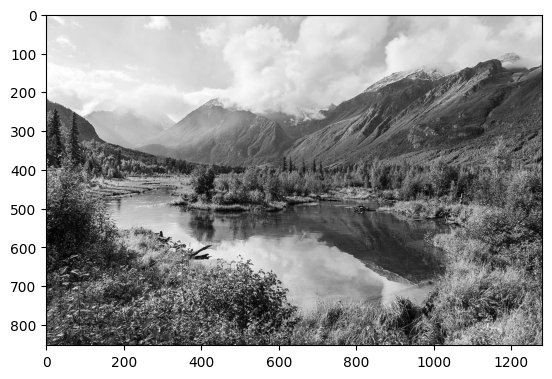

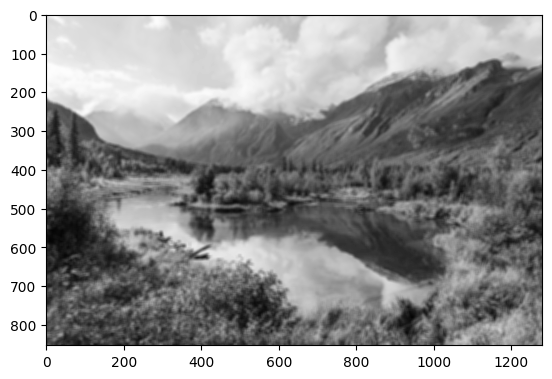

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255) #real image
plt.show()

k_size = 9 # kernel size
mean_kernel = np.ones([k_size, k_size])/(k_size**2) # mean kernel definition

img_tr = cv2.filter2D(img, -1, mean_kernel)
                 #input, channel depth, kernel

plt.imshow(img_tr, cmap = 'gray', vmin = 0, vmax = 255) #filtered image
plt.show()


### 2.3 How to implement a Gaussian filter
Gaussian filters are a special case of LSI operator where we sample from a 2D gaussian the values of our kernel.

Given standard deviation $\sigma$ and kernel size $k$ we can obtain a 1D gaussian kernel in OpenCV with the function:

`gk = cv2.getGaussianKernel(kernel_size,sigma)`

which, since is 1D it has a shape `[kernel_size , 1]`.

If we want a 2D gaussian filter with both $\sigma_x$ and $\sigma_y$ having the same value we can multiply the two 1D kernels with:

`gk_2D = gk.dot(gk.transpose())`

Otherwise, we can obtain the same result applying first the 1D gaussian kernel $g_k$ and then, applying its tranposed one $g_k^T$.

Applying twice a 1D kernel instead of a 2D filter can be faster, expecially in case of big kernels.

We can also use an high level API of OpenCV which given the kernel size and sigmas compute the gaussian filtering:

`gauss_out = cv2.GaussianBlur(image, (k_size, k_size) , sigma)`

### 2.4 How to implement Bilateral filter

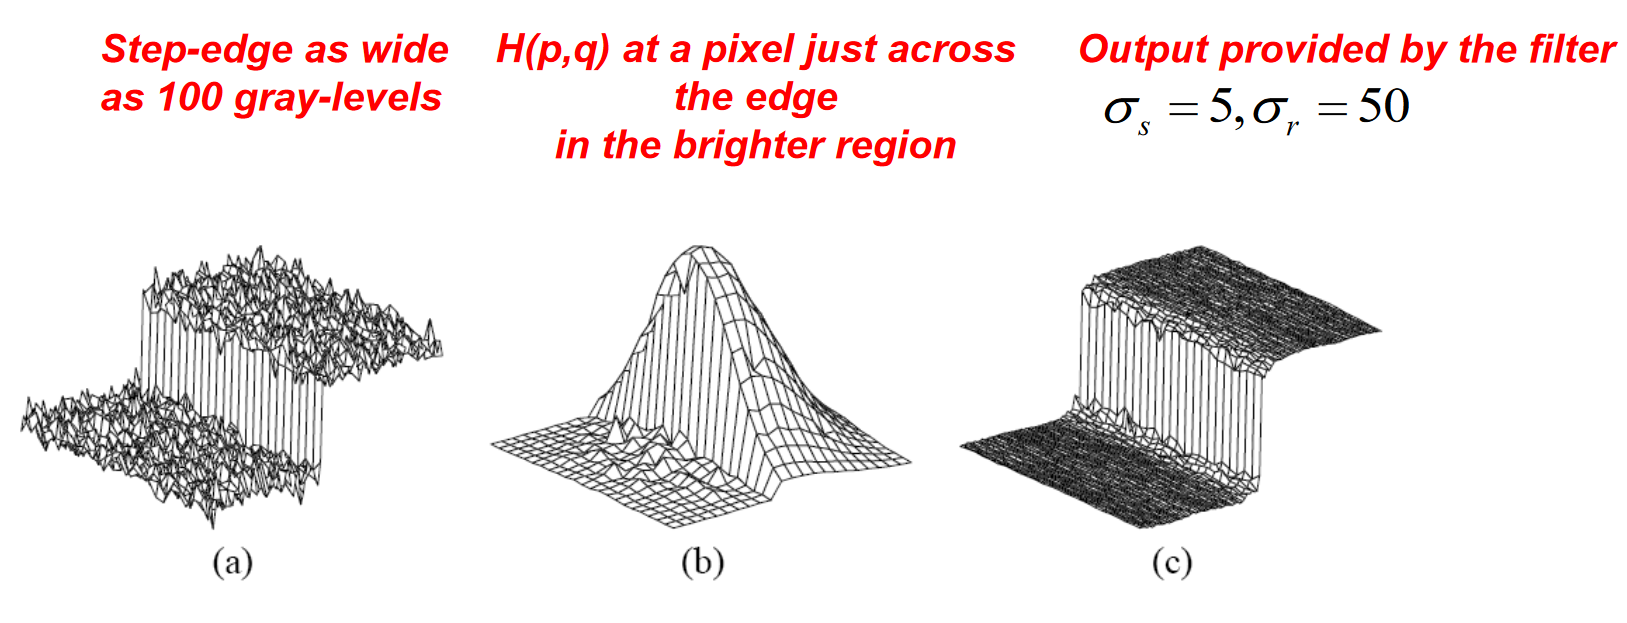

Bilateral filtering is highly effective at **noise removal** while **preserving edges**, however, such operation is **slower** compared to other filters.

**Gaussian filters** are functions of **space** alone and do not consider whether pixels have almost the same intensity value or not, resulting in blurred edges.

**Bilateral filter** employs two Gaussian filters: a Gaussian filter in the **space** domain and a Gaussian filter in the **pixel intensity** domain.

* The function of space makes sure that only pixels are spatial neighbours are considered for filtering;
* The function of intensity ensures that only those pixels with intensities similar to that of the central pixel are included to compute the blurred intensity value.

As a result, this method preserves edges, since for pixels lying near edges, neighbouring pixels are placed on the other side of the edge and exhibit large intensity variations when compared to the central pixel, which hence will not be included for blurring.

We can apply a bilateral filter in OpenCV with:

`cv2.bilateralFilter(image, filter_size, sigmaColor, sigmaSpace)`

Check the documentation -> [Click](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)

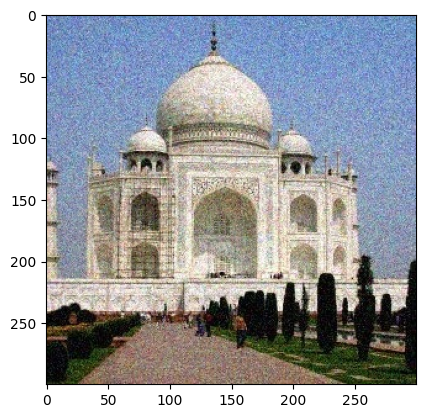

In [45]:
img = cv2.imread('taj.jpg')
image_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

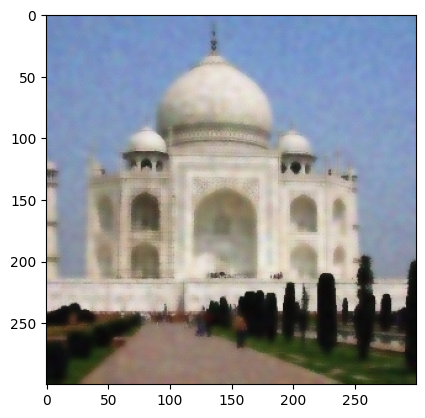

In [46]:
denoised_img = cv2.bilateralFilter(image_rgb, 9, 200, 75)

plt.imshow(denoised_img)
plt.show()

## 3. Edge detection


Canny Edge Detection is a popular edge detection algorithm and it is already implemented in the OpenCV library.

See the docs here -> [Click](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

Let us see how we can apply it:




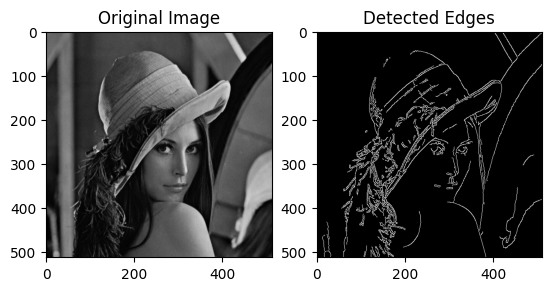

In [47]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img, 100, 200) # canny algorithm

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.title('Detected Edges')

plt.show()

# Excercises

## Exercise 1: pixel-wise differences between images


1. Compute an output image $I_o$ where each pixel of coordinates $(x,y)$ contains the absolute difference of the corresponding pixels on $I_1$ and $I_2$: $I_o(x,y) = |(I_1(x,y) – I_2(x,y))|$;

2. The, find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of $I_1$ obscuring (with value 0) those pixels. Display that image;

3. Save the new image on disk and check the result.

Test the exercise `differences1.png` and `differences2.png`.



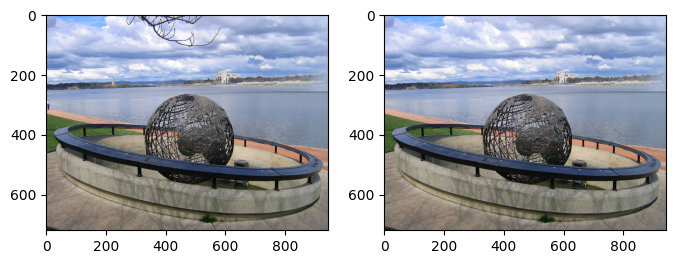

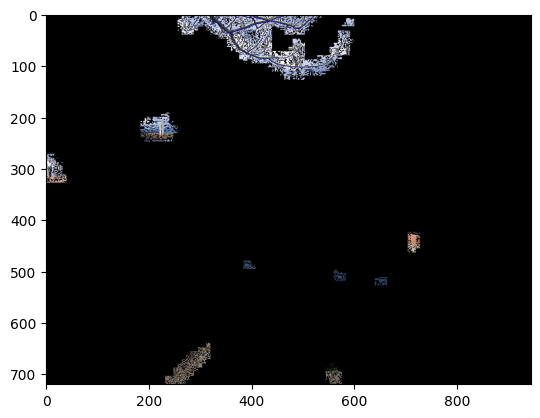

True

In [48]:
############ Complete with your code! ############

# Read the images.
image1 = cv2.imread('differences1.png')
image2 = cv2.imread('differences2.png')

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images.
plt.figure(figsize = (8, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.subplot(1, 2, 2)
plt.imshow(image2_rgb)
plt.show()

# Compute the mean difference along last axis and mask the images based on the threshold (remember to create a copy!).
def mask_images(image1, image2, threshold):
    # Compute mean difference along the last axis
    mean_diff = np.mean(np.abs(image1 - image2), axis=-1) # mean among the last channel

    # Create copies of the original images
    masked_image = np.copy(image1)

    # Mask images based on threshold
    masked_image[mean_diff <= threshold] = 0

    return masked_image

treshold = 20 # set the treshold
masked_image = mask_images(image1_rgb, image2_rgb, treshold) #call the function

# show the result
plt.imshow(masked_image)
plt.show()

# Save image on disk
cv2.imwrite("differences_between_1_and_2.png", masked_image)

## Exercise 2: Gaussian filtering

Apply a 2D gaussian filter with $\sigma=1.5$ to an image.

Do it three times:
* First by finding the gaussian kernel and applying it. First by exploiting the Gaussian separability and then with a 2D kernel;
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the grayscale image `landscape.jpg`.

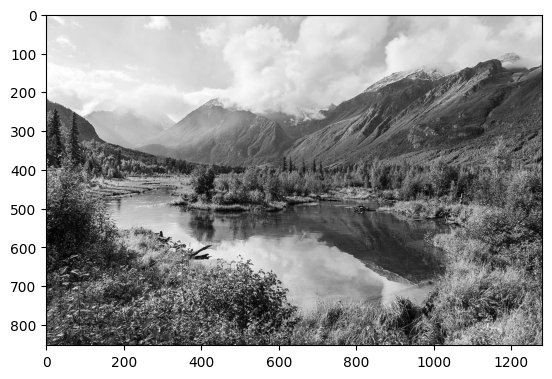


------------------------


Time needed to apply a 1D convolution twice: 0.006578683853149414.



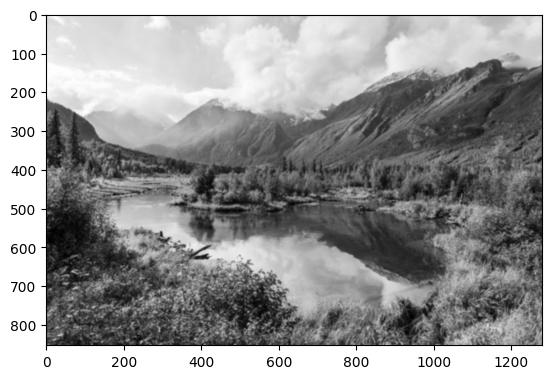


------------------------


Time needed to apply a 2D convolution directly: 0.011871099472045898.



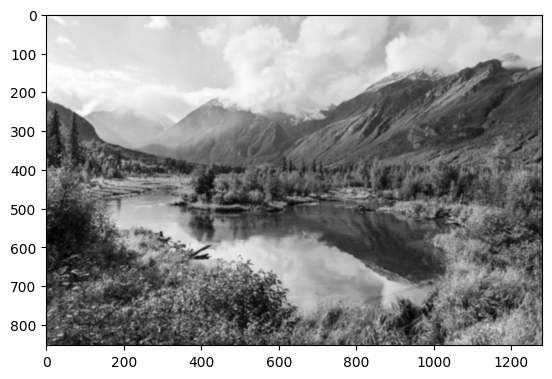


------------------------

Time needed to apply the OpenCV API: 0.0024406909942626953.


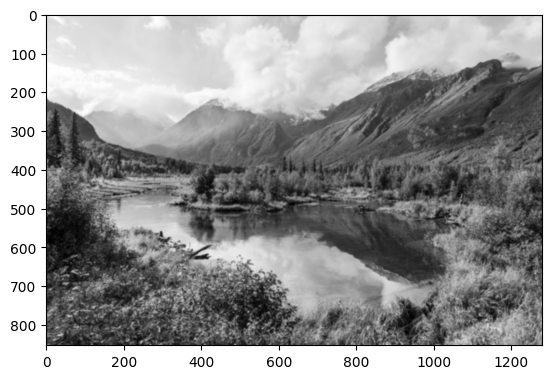

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

############ Complete with your code! ############

# Read the image.
img = cv2.imread('landscape.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image before filtering.
plt.imshow(img, cmap = 'gray')
plt.show()

print('')
print('------------------------')
print('')

# sigma value of the gaussian distribution
sigma = 1.5

# apply 1D gaussian kernel twice
def apply_gaussian_twice(image, sigma):

    # Create 1D Gaussian kernel
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)

    # Apply 1D Gaussian filtering separatedly
    img_smoothed = dst = cv2.sepFilter2D(image, -1, gaussian_kernel, gaussian_kernel, borderType=cv2.BORDER_DEFAULT)

    return img_smoothed

start = time.time()

img_tr = apply_gaussian_twice(img, sigma)

print('')
print(f"Time needed to apply a 1D convolution twice: {time.time() - start}.")
print('')

# Display the image after filtering.
plt.imshow(img_tr, cmap = 'gray')
plt.show()

print('')
print('------------------------')
print('')

# apply 2D gaussian kernel directly
def apply_gaussian(image, sigma):

    # Create 1D Gaussian kernel
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    gaussian_kernel_1D = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())

    # Apply 2D filter to the image
    img_smoothed = dst = cv2.filter2D(img, -1, gaussian_kernel_2D)

    return img_smoothed

start = time.time()

img_tr = apply_gaussian(img, sigma)

print('')
print(f"Time needed to apply a 2D convolution directly: {time.time() - start}.")
print('')

# Display the image after filtering.
plt.imshow(img_tr, cmap = 'gray')
plt.show()

print('')
print('------------------------')
print('')

# Using OpenCV function GaussianBlur.
k_size = int(2 * np.ceil(2 * sigma) + 1)

start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size, k_size) , sigma)

print(f"Time needed to apply the OpenCV API: {time.time() - start}.")

# display after filtering
plt.imshow(img_tr, cmap = 'gray')
plt.show()

## Exercise 2: Bilateral filtering
Apply a bilateral filter with filter size of $k=9$ and both sigma values of $75$.

Test it on the grayscale image `landscape.jpg`.

Note:
* Sigma values: if they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look cartoonish;
* Filter size: large filters (> 5) are very slow, so it is recommended to use $d=5$ for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

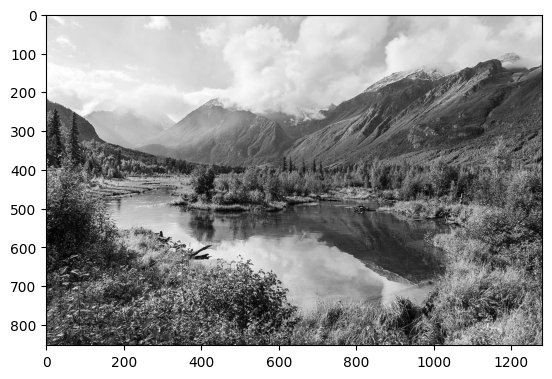


apply bilateral filter


time needed to apply bilateral filter: 117.99071192741394



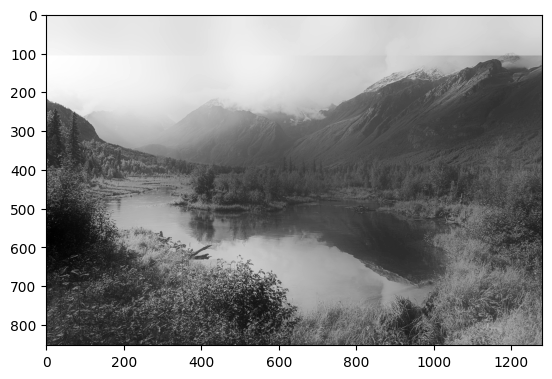

In [50]:
############ Complete with your code! ############

# Read the image.
img = cv2.imread('landscape.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image before filtering.
plt.imshow(img, cmap = 'gray')
plt.show()

print('')
print('apply bilateral filter')
print('')

# set sigam values
sigma_color = 75 # sensitivity to pixel intensity changes
sigma_space = 75 # sensitivity to spatial distance

start = time.time()
img_bilateral = cv2.bilateralFilter(img, -1, sigma_color, sigma_space, borderType=cv2.BORDER_DEFAULT) # apply non linear filter
print('')
print(f"time needed to apply bilateral filter: {time.time() - start}")
print('')

# Display the image after filtering.
plt.imshow(img_bilateral, cmap = 'gray')
plt.show()

## Exercise 3: Sobel filters
Apply the Sobel kernels to calculate the smooth derivates $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along $x$ and $y$ respectively. Visualize the absolute value of the two results.

Then, calculate the module of the gradient as $\max\Bigl(\bigl|\frac{dI(x, y)}{dx}\bigl|, \bigl|\frac{dI(x, y)}{dy}\bigl|\Bigr)$ and visualize also this last result.

Test it on the grayscale image `squares.png`.


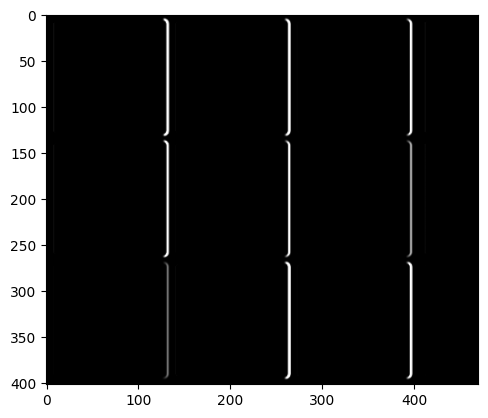

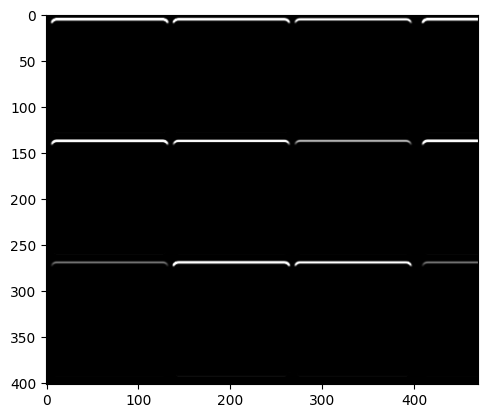

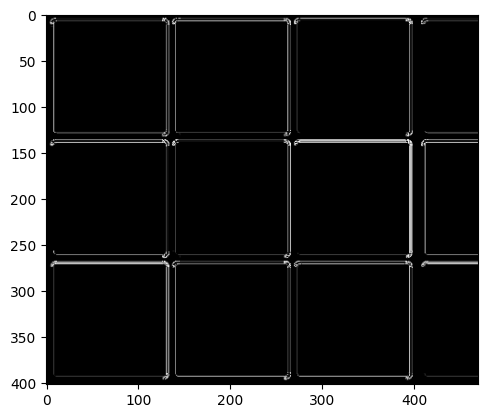

In [51]:
############ Complete with your code! ############

# Read the image.
img = cv2.imread('squares.png', cv2.IMREAD_GRAYSCALE)

# Define sobel kernels.
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]])

# Find |dI(x, y)/dx|.
dx = cv2.filter2D(img, -1, sobel_x)
dx = np.abs(dx)

# Display the kernel dx.
plt.imshow(dx, cmap = 'gray')
plt.show()

# Find |dI(x, y)/dy|.
dy = cv2.filter2D(img, -1, sobel_y)
dy = np.abs(dy)

# Display the kernel dy.
plt.imshow(dy, cmap = 'gray')
plt.show()

# Find the pixel-wise gradient module.

gradient_module = (dx**2 + dy**2)**.5

# Display the kernel dx.
plt.imshow(gradient_module, cmap = 'gray')
plt.show()